## Question 1

$$P = X(X'X)^{-1}X' \ and \ M = I_n - P$$
Using only the equation $$y = X \beta + e \ and \ \hat\beta = (X'X)^{-1}X'y$$

#### Part A

P is idempotent (PP=P)
$$PP = (X(X'X)^{-1}X')(X(X'X)^{-1}X')$$
$$PP = (XX^{-1}X'^{-1}X')(XX^{-1}X'^{-1}X')$$
$$PP = I_n I_n$$

Therefore $$P=I_n \ and \ PP = P$$

#### Part B

M is idempotent
$$MM = (I_n - P)(I_n - P)$$
$$MM = I_n - I_nP - I_nP + PP$$
$$MM = I_n - P - P + P$$
$$MM = I_n - P = M$$

#### Part C

$$Py = \hat y$$
Therefore, $$X(X'X)^{-1}X'y$$
$$= X [(X'X)^{-1}X'y]$$
$$= X \hat\beta$$
$$= \hat y$$

#### Part D
$$My = \hat e$$
Let's prove it-
$$My = (I_n - P)y$$
$$My = I_ny - Py$$
$$My = y - Py$$
$$My = y - \hat y = \hat e$$

#### Part E
$$Py + My = y$$
Let's prove it:
$$Py + My = \hat y + \hat e \ (From \ c \ and \ d)$$
$$Py + My = y$$


#### Part F
$$ \hat y \perp \hat e, \ that \ means \ \hat y . \hat e = 0 $$
$$ (Py).(My) = (Py^2)(I_n - P)$$
$$ = Py^2 - PPy^2$$
$$ = Py^2 - Py^2 \ (Since \ P \ is \ idempotent)$$
$$ (Py).(My) = 0$$
Hence, proved

## Question 2

#### Generalized hailstone numbers ####

In [1]:
def custom_hailstone_sequence(a, b, max_numbers):
    holding_patterns = []

    for start_number in range(1, max_numbers):
        sequence = []
        print("--- Start number =", start_number)
        
        while start_number > 1:
            sequence.append(start_number)
            count_dict = {}
            
            for num in sequence:
                count_dict[num] = count_dict.get(num, 0) + 1

            max_key = max(count_dict, key=count_dict.get)
            max_count = count_dict[max_key]
            
            ind = sequence.index(max_key)
            holding_pattern = sequence[ind:]

            if start_number % 2 == 0:
                start_number //= 2
            else:
                start_number = a * start_number + b

            if len(sequence) > 50:
                print("This sequence does not converge")
                break

        if len(sequence) != len(set(sequence)):
            holding_patterns.append((len(sequence), holding_pattern))
            print("The sequence contains", len(sequence), "steps")
            print("The holding pattern is", holding_pattern)

    print("Number of holding patterns =", len(holding_patterns))

In [ ]:
for a in range(1, 11):
    for b in range(1, 11):
        print('--> When a = ' + str(a) + ', and b = ' + str(b))
        custom_hailstone_sequence(a, b, 100)

--> When a = 1, and b = 1
--- Start number = 1
--- Start number = 2
--- Start number = 3
--- Start number = 4
--- Start number = 5
--- Start number = 6
--- Start number = 7
--- Start number = 8
--- Start number = 9
--- Start number = 10
--- Start number = 11
--- Start number = 12
--- Start number = 13
--- Start number = 14
--- Start number = 15
--- Start number = 16
--- Start number = 17
--- Start number = 18
--- Start number = 19
--- Start number = 20
--- Start number = 21
--- Start number = 22
--- Start number = 23
--- Start number = 24
--- Start number = 25
--- Start number = 26
--- Start number = 27
--- Start number = 28
--- Start number = 29
--- Start number = 30
--- Start number = 31
--- Start number = 32
--- Start number = 33
--- Start number = 34
--- Start number = 35
--- Start number = 36
--- Start number = 37
--- Start number = 38
--- Start number = 39
--- Start number = 40
--- Start number = 41
--- Start number = 42
--- Start number = 43
--- Start number = 44
--- Start numbe

In [6]:
def hailstone(a, b, start):
    sequence = [start]
    
    while True:
        if sequence[-1] % 2 == 0:
            next_term = sequence[-1] // 2
        else:
            next_term = a * sequence[-1] + b
        
        if next_term in sequence:
            break
        
        sequence.append(next_term)
        
        if len(sequence)>10:
            break
    
    return sequence

def count_holding_patterns(a_range, b_range):
    convergence_dict = {}
    
    for a in range(1, a_range + 1):
        for b in range(1, b_range + 1):
            holding_patterns_for_a_b = []
            check_repeat = []

            for start in range(1, 11):  # Check up to the first 10 terms
                sequence = hailstone(a, b, start)
                holding_patterns_for_a_b.append(tuple(sequence))
                check_repeat.append(tuple(set(sequence))) 

            oc_set = set()
            res = []
            for idx, val in enumerate(check_repeat):
                if val not in oc_set:
                    oc_set.add(val)
                else:
                    res.append(idx)
            
            new_holding_patterns = []
            for idx, seq in enumerate(holding_patterns_for_a_b):
                if idx not in res and len(seq) <= 10:
                    new_holding_patterns.append(seq)
            
            holding_patterns_for_a_b = new_holding_patterns
            
            if len(holding_patterns_for_a_b) > 0:
                convergence_dict[f"{a} and {b} = True"] = holding_patterns_for_a_b
            else:
                convergence_dict[f"{a} and {b} = False"] = None
    
    return convergence_dict



a_range = 10
b_range = 10
convergence_dict = count_holding_patterns(a_range, b_range)


In [7]:
for key, value in convergence_dict.items():
    print(key, ":", value)

1 and 1 = True : [(1, 2), (3, 4, 2, 1), (4, 2, 1), (5, 6, 3, 4, 2, 1), (6, 3, 4, 2, 1), (7, 8, 4, 2, 1), (8, 4, 2, 1), (9, 10, 5, 6, 3, 4, 2, 1), (10, 5, 6, 3, 4, 2, 1)]
1 and 2 = False : None
1 and 3 = True : [(1, 4, 2), (3, 6), (5, 8, 4, 2, 1), (7, 10, 5, 8, 4, 2, 1), (8, 4, 2, 1), (9, 12, 6, 3), (10, 5, 8, 4, 2, 1)]
1 and 4 = False : None
1 and 5 = True : [(1, 6, 3, 8, 4, 2), (5, 10), (7, 12, 6, 3, 8, 4, 2, 1), (9, 14, 7, 12, 6, 3, 8, 4, 2, 1)]
1 and 6 = False : None
1 and 7 = True : [(1, 8, 4, 2), (3, 10, 5, 12, 6), (7, 14), (9, 16, 8, 4, 2, 1)]
1 and 8 = False : None
1 and 9 = True : [(1, 10, 5, 14, 7, 16, 8, 4, 2), (3, 12, 6), (9, 18)]
1 and 10 = False : None
2 and 1 = False : None
2 and 2 = True : [(1, 4, 2), (3, 8, 4, 2, 1), (5, 12, 6, 3, 8, 4, 2, 1), (6, 3, 8, 4, 2, 1), (7, 16, 8, 4, 2, 1), (8, 4, 2, 1), (10, 5, 12, 6, 3, 8, 4, 2, 1)]
2 and 3 = False : None
2 and 4 = False : None
2 and 5 = False : None
2 and 6 = True : [(1, 8, 4, 2), (3, 12, 6), (5, 16, 8, 4, 2, 1), (7, 20, 10

In [ ]:
def find_repeating_indexes(lst):
    index_dict = {}
    repeating_indexes = {}

    for idx, element in enumerate(lst):
        if element in index_dict:
            repeating_indexes.setdefault(element, []).append(idx)
        else:
            index_dict[element] = idx

    # Remove the first occurrence indexes
    for element, indexes in repeating_indexes.items():
        indexes.pop(0)

    return repeating_indexes

# Example usage:
my_list = [1, 2, 3, 2, 4, 2, 5, 6, 4, 7, 7]
repeating_indexes = find_repeating_indexes(my_list)

for element, indexes in repeating_indexes.items():
    print(f"Element {element} repeats at indexes: {indexes}")


In [35]:
n = 4
ll = [n]

iteration = 50

conv = False
pattern = []


while iteration > 0: 
    if ll[-1]%2 != 0: 
        a = 1*ll[-1] + 1
    else: 
        a = ll[-1]//2
        
    if a in ll:     
        conv = True
        i = ll.index(a)
        pattern = ll[i:]
        break
    ll.append(a)
    
    
    iteration -= 1

print(ll)
print(conv)
print(pattern)


[4, 2, 1]
True
[2, 1]


In [14]:
ll.index(9)

0

In [122]:
def hailstone(a, b, iteration): 
    conv = False
    pattern = []
    
    set_pattern = []
    
    dci = 'a = {} and b = {}'.format(a, b)
    
    for n in range(1,11):
        ll = [n]
        i = iteration

        while i > 0: 
            if ll[-1]%2 != 0: 
                xn = a*ll[-1] + b
            else: 
                xn = ll[-1]//2

            if xn in ll:     
                conv = True
                k = ll.index(xn)
                seq = ll[k:]
                
                if set(seq) not in set_pattern : 
                
                    set_pattern.append(set(seq))
                    pattern.append(seq)   
                break
            ll.append(xn)
            i -= 1
    
    dci += ' Convergence: ' + str(conv) + ',  Pattern:' + str(pattern)  
    
    return dci

        
        
print(hailstone(3, 5, 50))

a = 3 and b = 5 Convergence: True,  Pattern:[[1, 8, 4, 2], [38, 19, 62, 31, 98, 49, 152, 76], [5, 20, 10]]


In [123]:
for a in range(1, 11): 
    for b in range(1, 11): 
        print(hailstone(a, b, 50))

a = 1 and b = 1 Convergence: True,  Pattern:[[1, 2]]
a = 1 and b = 2 Convergence: False,  Pattern:[]
a = 1 and b = 3 Convergence: True,  Pattern:[[1, 4, 2], [3, 6]]
a = 1 and b = 4 Convergence: False,  Pattern:[]
a = 1 and b = 5 Convergence: True,  Pattern:[[1, 6, 3, 8, 4, 2], [5, 10]]
a = 1 and b = 6 Convergence: False,  Pattern:[]
a = 1 and b = 7 Convergence: True,  Pattern:[[1, 8, 4, 2], [3, 10, 5, 12, 6], [7, 14]]
a = 1 and b = 8 Convergence: False,  Pattern:[]
a = 1 and b = 9 Convergence: True,  Pattern:[[1, 10, 5, 14, 7, 16, 8, 4, 2], [3, 12, 6], [9, 18]]
a = 1 and b = 10 Convergence: False,  Pattern:[]
a = 2 and b = 1 Convergence: False,  Pattern:[]
a = 2 and b = 2 Convergence: True,  Pattern:[[1, 4, 2]]
a = 2 and b = 3 Convergence: False,  Pattern:[]
a = 2 and b = 4 Convergence: False,  Pattern:[]
a = 2 and b = 5 Convergence: False,  Pattern:[]
a = 2 and b = 6 Convergence: True,  Pattern:[[1, 8, 4, 2], [3, 12, 6]]
a = 2 and b = 7 Convergence: False,  Pattern:[]
a = 2 and b = 8 

In [52]:
def hailstone3(max_num):
    saves = {1: 0}
    for x in range(1, max_num):
        init = x
        count = 0 
        while x not in saves.keys():
            if x%2 != 0:
                x = 3*x + 1 
            else:
                x //= 2
            
            count += 1 
        count += saves[x]
        
        saves[init] = count
        
    return saves

%timeit hailstone3(1000000)
            

1.71 s ± 36.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
def hailstone4(max_num):
    saves = {1: 0}
    ll = []
    for x in range(1, max_num):
        init = x
        count = 0 
        while x not in ll:
            
            if x%2 != 0:
                x = 3*x + 1 
            else:
                x //= 2
                
            
            count += 1
        
        count += saves[x]
        ll.append(init)
        saves[init] = count
        
    return saves

%timeit hailstone3(1000000)

1.72 s ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [92]:
ll = [1, 3,3, 1]
ln = [1]
d = len(ll)
for i in range(d-1):
    ln += [sum(ll[i:i+2])]
    
ln += [1]
ln

[1, 4, 6, 4, 1]

In [119]:
def pascal_init(ll):
    ln = [1]
    d = len(ll)
    for i in range(d-1):
        ln += [sum(ll[i:i+2])]    
    ln.append(1)
    return ln

def pascal(max_num):
    l = [1]
    for i in range(max_num):
        print(' '.join([str(k) for k in l]))
        l = pascal_init(l)
    
pascal(25)       

1
1 1
1 2 1
1 3 3 1
1 4 6 4 1
1 5 10 10 5 1
1 6 15 20 15 6 1
1 7 21 35 35 21 7 1
1 8 28 56 70 56 28 8 1
1 9 36 84 126 126 84 36 9 1
1 10 45 120 210 252 210 120 45 10 1
1 11 55 165 330 462 462 330 165 55 11 1
1 12 66 220 495 792 924 792 495 220 66 12 1
1 13 78 286 715 1287 1716 1716 1287 715 286 78 13 1
1 14 91 364 1001 2002 3003 3432 3003 2002 1001 364 91 14 1
1 15 105 455 1365 3003 5005 6435 6435 5005 3003 1365 455 105 15 1
1 16 120 560 1820 4368 8008 11440 12870 11440 8008 4368 1820 560 120 16 1
1 17 136 680 2380 6188 12376 19448 24310 24310 19448 12376 6188 2380 680 136 17 1
1 18 153 816 3060 8568 18564 31824 43758 48620 43758 31824 18564 8568 3060 816 153 18 1
1 19 171 969 3876 11628 27132 50388 75582 92378 92378 75582 50388 27132 11628 3876 969 171 19 1
1 20 190 1140 4845 15504 38760 77520 125970 167960 184756 167960 125970 77520 38760 15504 4845 1140 190 20 1
1 21 210 1330 5985 20349 54264 116280 203490 293930 352716 352716 293930 203490 116280 54264 20349 5985 1330 210 21 1
1 22

In [93]:
def pascal_init(ll):
    ln = [1]
    d = len(ll)
    for i in range(d-1):
        ln += [sum(ll[i:i+2])]    
    ln.append(1)
    return ln

pascal_init([1, 1])

[1, 2, 1]

In [112]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(data=None, *, x=None, y=None, hue=None, weights=None, palette=None, hue_order=None, hue_norm=None, color=None, fill=None, multiple='layer', common_norm=True, common_grid=False, cumulative=False, bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
    Plot univariate or bivariate distributions using kernel density estimation.
    
    A kernel density estimate (KDE) plot is a method for visualizing the
    distribution of observations in a dataset, analogous to a histogram. KDE
    represents the data using a continuous probability density curve in one or
    more dimensions.
    
    The approach is explained further in the :ref:`user guide <tutorial_kde>`.
    
    Relative to a histogram, KDE can produce a plot that is less cluttered and
    more interpretable, especially whe

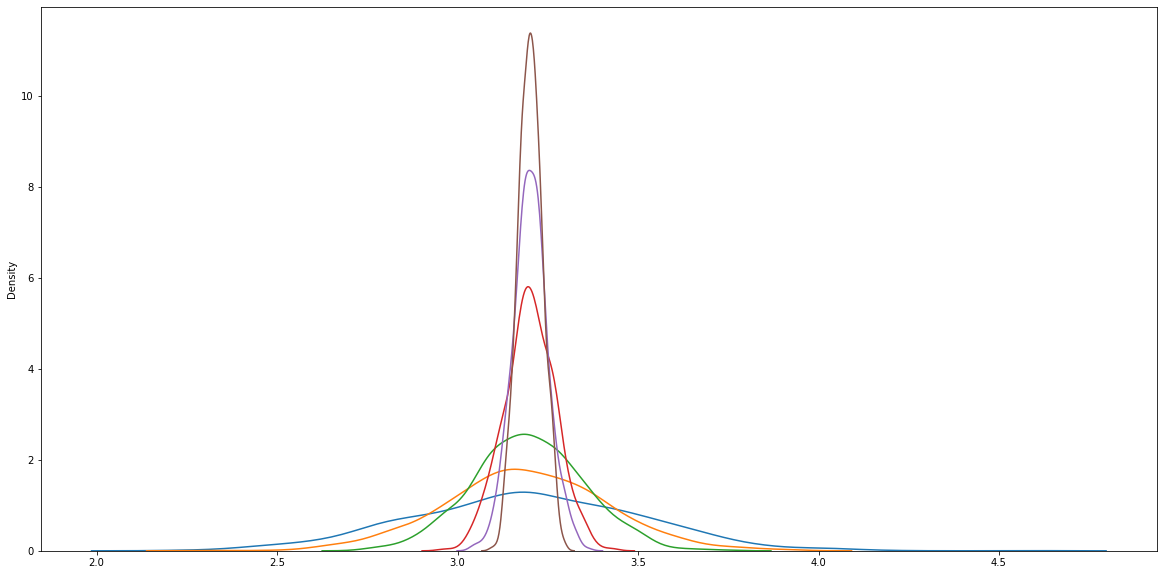

In [118]:
nsim = 1000
nvec = [25, 50, 100, 500, 1000, 2000]
outp = np.zeros([nsim, len(nvec)])

for i in range(len(nvec)):
    n = nvec[i]
    for j in range(nsim):
        e = np.random.normal(0, 1, n)
        w = np.random.normal(0, 1, n)
        z = w + np.random.normal(0, 1, n)
        x = 2*w + np.random.normal(0, 1, n)
        y = 2*x + 3*z + e
        xo = np.hstack([np.ones([n, 1]), x.reshape(-1,1)])
        b = np.linalg.solve(xo.T@xo, xo.T@y)
        outp[j, i] = b[1]

plt.figure(figsize = [20, 10])
for n in range(len(nvec)):
    sns.kdeplot(outp[:, n], label = nvec[n])

In [104]:
x = np.random.normal(0, 1, n)

In [106]:
x.reshape(-1, 1)

array([[-0.48537561],
       [ 0.23739253],
       [-0.09990556],
       [-0.63276809],
       [-0.73167826],
       [ 0.10156546],
       [ 0.39878883],
       [ 0.47603714],
       [-0.54646677],
       [ 0.36495342],
       [ 0.32210138],
       [-0.64620932],
       [-0.57794006],
       [ 0.44927943],
       [ 1.00657855],
       [-0.05327568],
       [ 0.78965627],
       [ 1.32723984],
       [ 2.21374122],
       [-1.35014338],
       [-0.2158948 ],
       [-0.1372258 ],
       [-0.99645971],
       [-0.17638199],
       [ 0.44806068]])

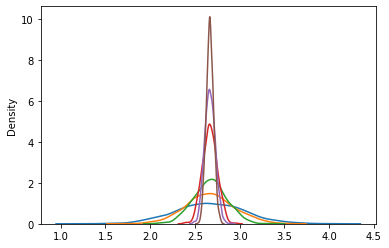

In [116]:
nsim = 1000
nvec = [25, 50, 100, 500, 1000, 2000]
outp = np.zeros([nsim, len(nvec)])

for i in range(len(nvec)):
    n = nvec[i]
    for j in range(nsim):
        e = np.random.normal(0, 1, n)
        w = np.random.normal(0, 1, n)
        z = w + np.random.normal(0, 1, n)
        x = 2*w + np.random.normal(0, 1, n)
        y = 2*x + 3*z + e
        xs = x + np.random.normal(0, 1, n)
        ys = y + np.random.normal(0, 1, n)
        xo = np.hstack([np.ones([n, 1]), xs.reshape(-1,1)])
        b = np.linalg.solve(xo.T@xo, xo.T@y)
        outp[j, i] = b[1]
        
for n in range(len(nvec)):
    sns.kdeplot(outp[:, n], legend = nvec[n])

In [107]:
xo = np.hstack([, x.reshape(-1,1)])
xo

TypeError: Cannot interpret '1' as a data type